In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.io as sio

In [178]:
def butter_pass(cutOff, fs, order=2, btype = 'low'):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = scisig.butter(order, normalCutoff, btype=btype, analog = False)
    return b, a

def butter_pass_filter(data, cutOff, fs, order=2, btype = 'low'):
    b, a = butter_pass(cutOff, fs, order=order, btype = btype)
    y = scisig.lfilter(b, a, data)
    return y

In [304]:
filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240329/Weekend/tt (683).mat'
data = sio.loadmat(filename)

In [305]:
data

{'Tstart': array([[0.]]),
 'Tinterval': array([[9.99999997e-07]]),
 'ExtraSamples': array([[0]]),
 'RequestedLength': array([[20000000]]),
 'Length': array([[20000000]]),
 'A': array([[4.0321693],
        [4.0031743],
        [4.008973 ],
        ...,
        [4.0553656],
        [4.078562 ],
        [4.0437675]], dtype=float32),
 'B': array([[1.5593334],
        [1.5507874],
        [1.5478879],
        ...,
        [1.5825295],
        [1.5997741],
        [1.6084727]], dtype=float32),
 'C': array([[-2.2472835],
        [-2.2472835],
        [-2.2472835],
        ...,
        [-2.264528 ],
        [-2.2616286],
        [-2.264528 ]], dtype=float32),
 'F': array([[0.6253815 ],
        [0.62300086],
        [0.6253815 ],
        ...,
        [0.6265413 ],
        [0.6253815 ],
        [0.6265413 ]], dtype=float32),
 'H': array([[-inf],
        [-inf],
        [-inf],
        ...,
        [-inf],
        [-inf],
        [-inf]], dtype=float32),
 'Version': array(['6', '.', '1', '4', '.'

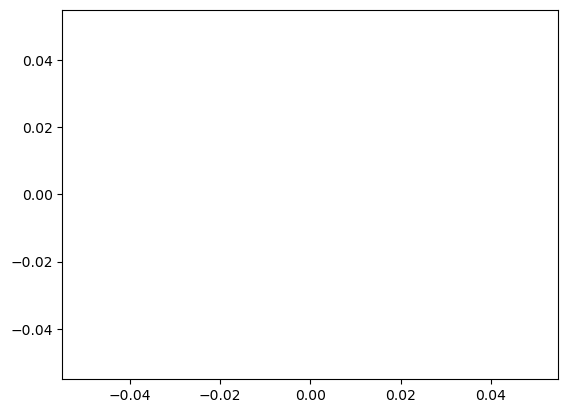

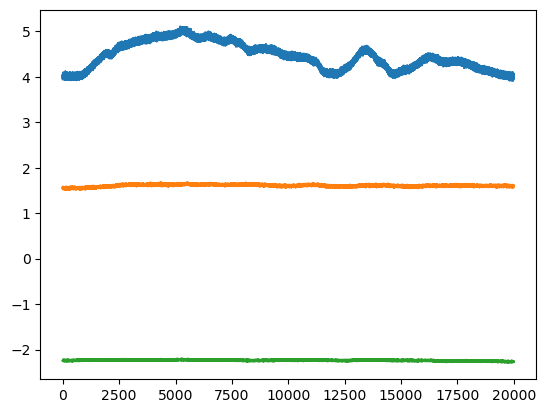

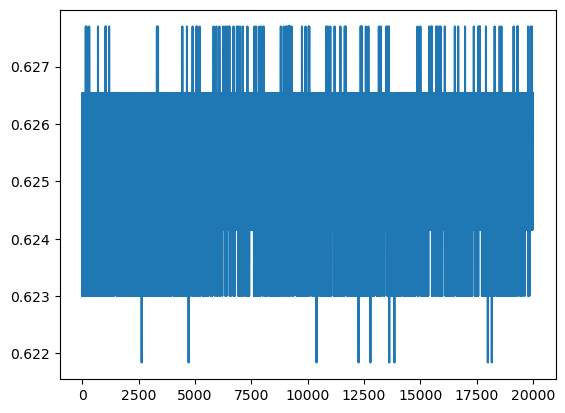

In [306]:
plt.plot(np.transpose(data['H'])[0][::1000])
plt.figure()
plt.plot(np.transpose(data['A'])[0][::1000])
plt.plot(np.transpose(data['B'])[0][::1000])
plt.plot(np.transpose(data['C'])[0][::1000])
plt.figure()
plt.plot(np.transpose(data['F'])[0][::1000])

In [307]:
z = np.transpose(data['C'])[0]
z_low = butter_pass_filter(z, 80000, fs = 10**6, order = 2, btype = 'low')
z_band = butter_pass_filter(z_low, 40000, fs = 10**6, order = 2, btype = 'high')

x = np.transpose(data['B'])[0]
x_low = butter_pass_filter(x, 200000, fs = 10**6, order = 2, btype = 'low')
x_band = butter_pass_filter(x_low, 300000, fs = 10**6, order = 2, btype = 'high')

y = np.transpose(data['A'])[0]
y_low = butter_pass_filter(y, 300000, fs = 10**6, order = 2, btype = 'low')
y_band = butter_pass_filter(y_low, 400000, fs = 10**6, order = 2, btype = 'high')

time = np.linspace(0, len(z)/(10**6), len(z))
lb = int(0.7*10**6)
ub = int(7*10**6)
PSDz = scisig.welch(z[lb:ub], fs = 10**6, nperseg = 10**5)
PSDz_band = scisig.welch(z_band[lb:ub], fs = 10**6, nperseg = 10**5)

PSDx = scisig.welch(x[lb:ub], fs = 10**6, nperseg = 10**5)
PSDx_band = scisig.welch(x_band[lb:ub], fs = 10**6, nperseg = 10**5)

PSDy = scisig.welch(y[lb:ub], fs = 10**6, nperseg = 10**5)
PSDy_band = scisig.welch(y_band[lb:ub], fs = 10**6, nperseg = 10**5)

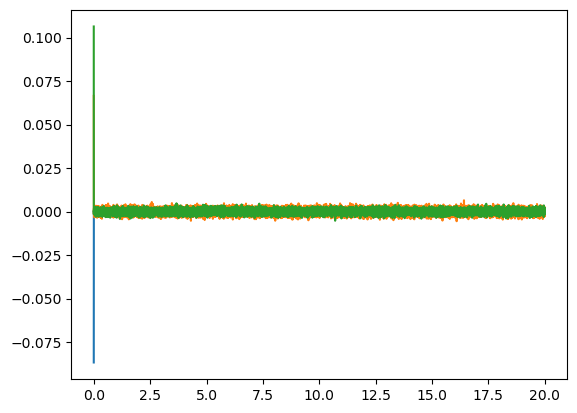

In [308]:
#plt.plot(z[::1000])
lb = int(8.7*10**6)
ub = int(9.2*10**6)

lb = int(0*10**6)
ub = int(20*10**6)

plt.plot(time[lb:ub:1000], z_band[lb:ub:1000])
plt.plot(time[lb:ub:1000], x_band[lb:ub:1000])
plt.plot(time[lb:ub:1000], y_band[lb:ub:1000])

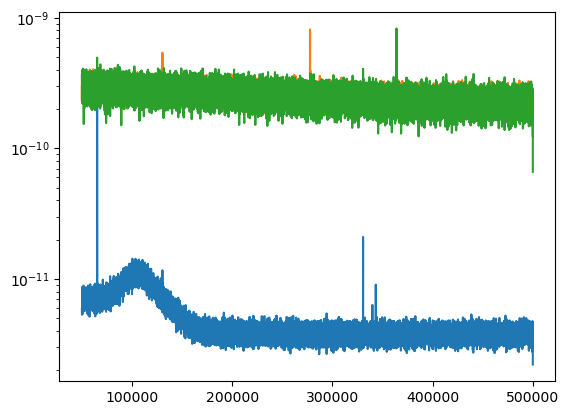

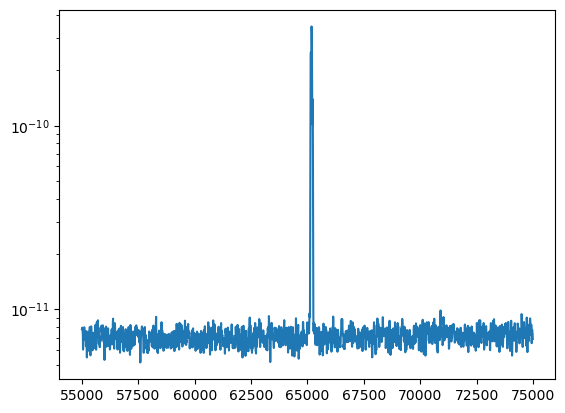

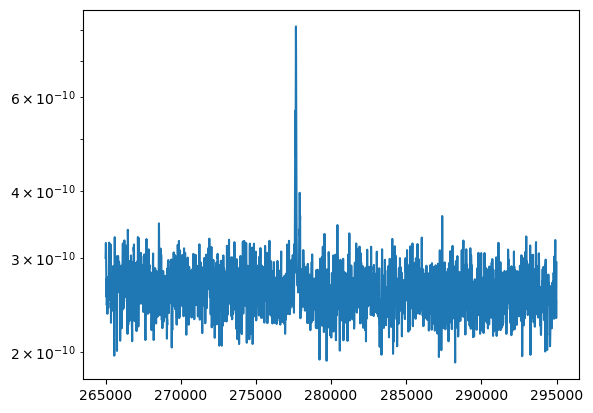

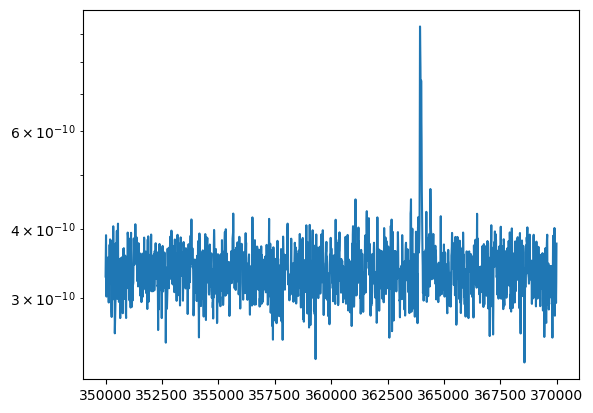

In [309]:
lb = 5000
ub = 500000
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
#plt.plot(PSDz[0][lb:ub], PSDz_band[1][lb:ub])
plt.plot(PSDx[0][lb:ub], PSDx[1][lb:ub])
#plt.plot(PSDx[0][lb:ub], PSDx_band[1][lb:ub])
plt.plot(PSDy[0][lb:ub], PSDy[1][lb:ub]-10**(-10))
#plt.plot(PSDy[0][lb:ub], PSDy_band[1][lb:ub])
plt.yscale('log')
lb = 5500
ub = 7500
plt.figure()
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.yscale('log')
lb = 26500
ub = 29500
plt.figure()
plt.plot(PSDx[0][lb:ub], PSDx[1][lb:ub])
plt.yscale('log')
lb = 35000
ub = 37000
plt.figure()
plt.plot(PSDy[0][lb:ub], PSDy[1][lb:ub])
plt.yscale('log')

In [ ]:

PSDy_l = []
for i in range(20):
    PSD_tmp = scisig.welch(y[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**5)
    PSDy_l.append(PSD_tmp)

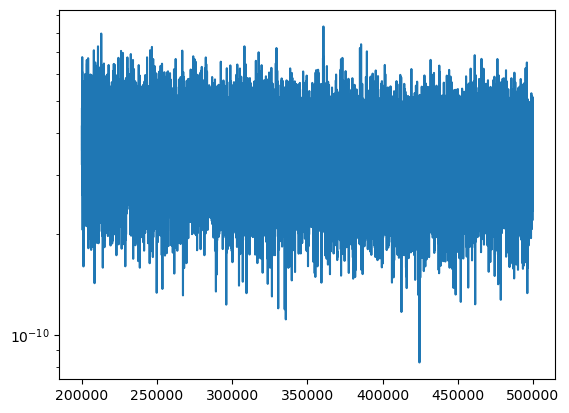

In [ ]:
lb = 20000
ub = 50000


plt.plot(PSDy_l[0][0][lb:ub], PSDy_l[0][1][lb:ub])
plt.yscale('log')

In [ ]:
p = np.transpose(data['F'])[0]

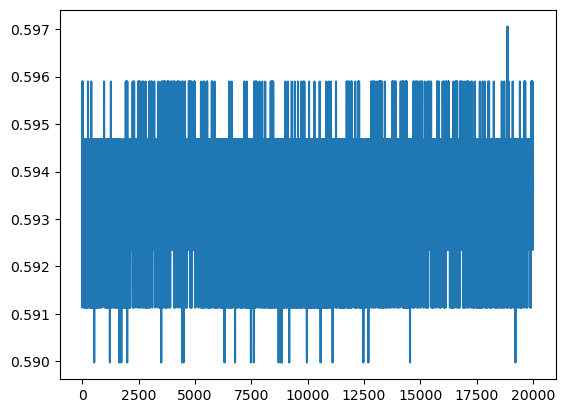

In [ ]:
plt.plot(p[::1000])

In [ ]:
tot_num2 = 57

In [258]:

#PSDx_l2 = []
PSDz_l2 = []
#PSDy_l2 = []
#FB = []
#LP2 = []
#tot_num2 = 579
for i in range(200, 779):
    filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240328/Overnight/tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    """
    x = np.transpose(data['A'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDy_l2.append(PSDx[1])
    x = np.transpose(data['B'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDx_l2.append(PSDx[1])
    """
    x = np.transpose(data['C'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDz_l2.append(PSDx[1])
    """
    x = np.transpose(data['H'])[0]
    FB.append(np.mean(x))
    x = np.transpose(data['F'])[0]
    LP2.append(np.mean(x))
    """

Text(0, 0.5, 'Laser Power (V)')

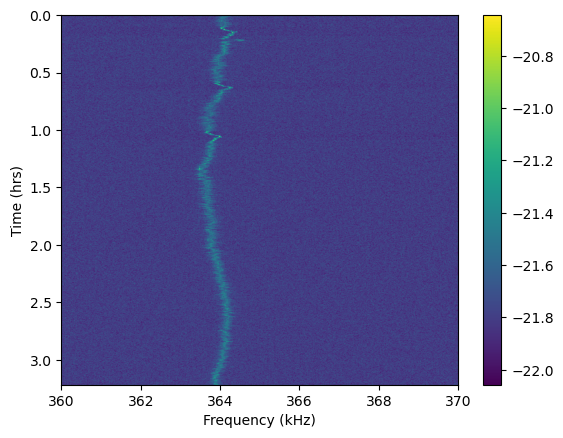

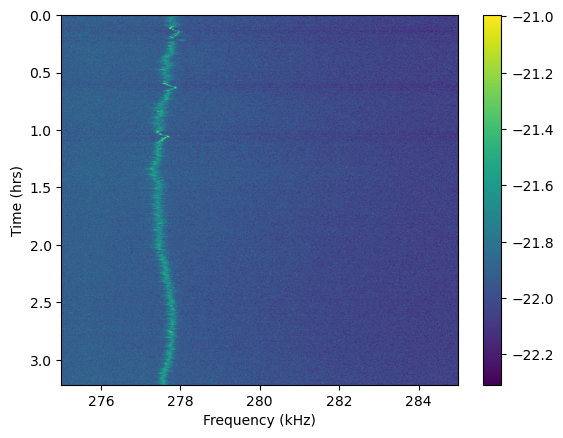

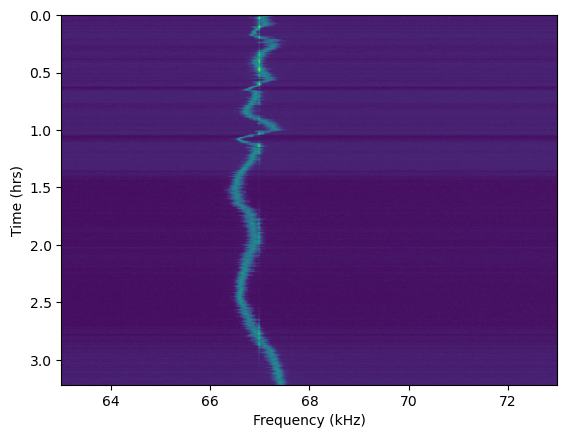

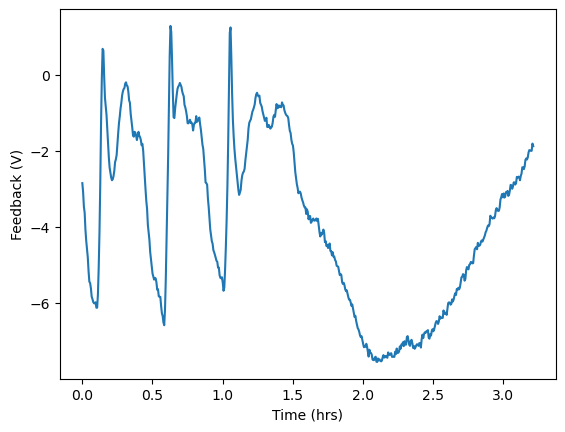

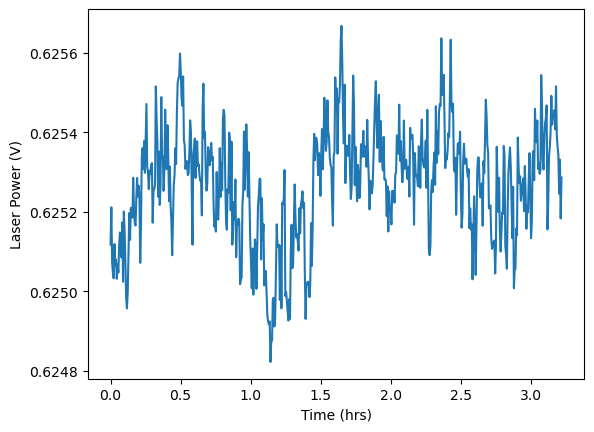

In [259]:
lb = 36000
ub = 37000
plt.imshow(np.log(np.array(PSDy_l2)[:,lb:ub]), aspect = 'auto', extent = (360, 370, tot_num2*20/3600, 0))
plt.colorbar()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
lb = 27500
ub = 28500
plt.figure()
plt.imshow(np.log(np.array(PSDx_l2)[:,lb:ub]), aspect = 'auto', extent = (275, 285, tot_num2*20/3600, 0))
plt.colorbar()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
lb = 6300
ub = 7300
plt.figure()
plt.imshow(np.log(np.array(PSDz_l2)[:,lb:ub]), aspect = 'auto', extent = (63, 73, tot_num2*20/3600, 0))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
plt.figure()
plt.plot(np.linspace(0, tot_num2*20/3600, tot_num2), FB)
plt.xlabel('Time (hrs)')
plt.ylabel('Feedback (V)')
plt.figure()
plt.plot(np.linspace(0, tot_num2*20/3600, tot_num2), LP2)
plt.xlabel('Time (hrs)')
plt.ylabel('Laser Power (V)')

In [159]:

#PSDx_l = []
#PSDz_l = []
#PSDy_l = []
#Charge = []
#LP = []
tot_num = 64+210+35
for i in range(276,311):
    filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240327/No PI Loop/tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    x = np.transpose(data['A'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDy_l.append(PSDx[1])
    x = np.transpose(data['B'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDx_l.append(PSDx[1])
    x = np.transpose(data['B'])[0]
    PSDx = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    PSDz_l.append(PSDx[1])
    x = np.transpose(data['D'])[0]
    Charge.append(np.mean(x))
    x = np.transpose(data['F'])[0]
    LP.append(np.mean(x))

Text(0, 0.5, 'Laser Power (V)')

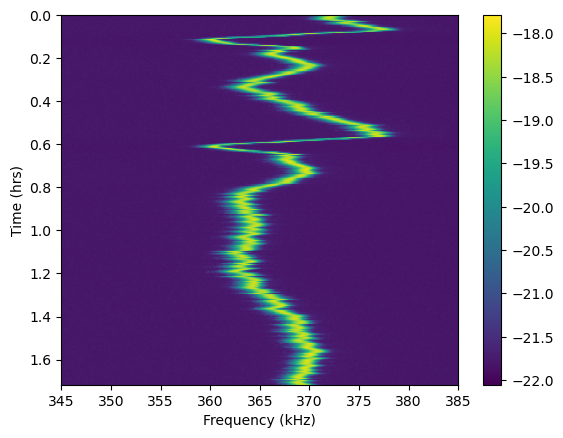

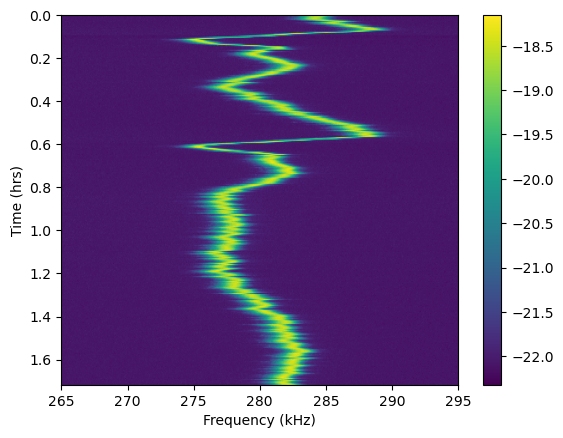

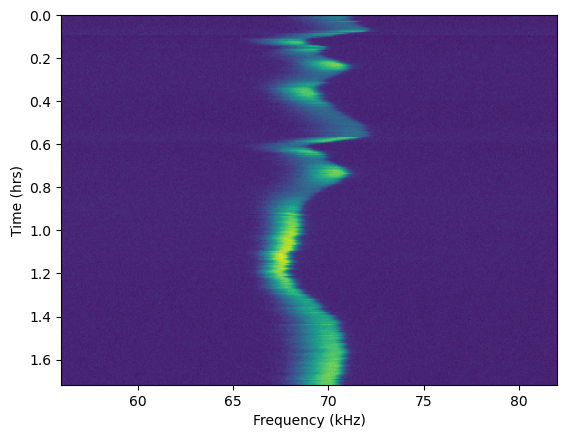

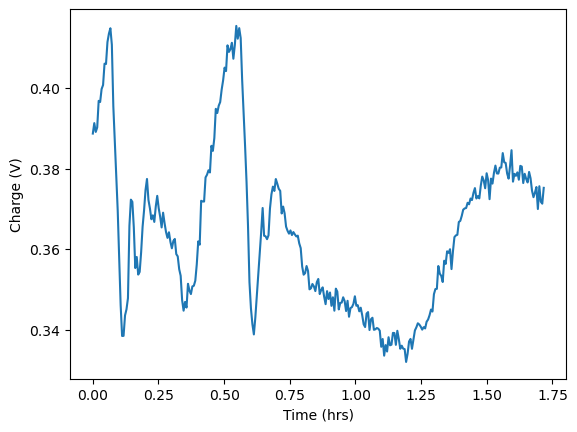

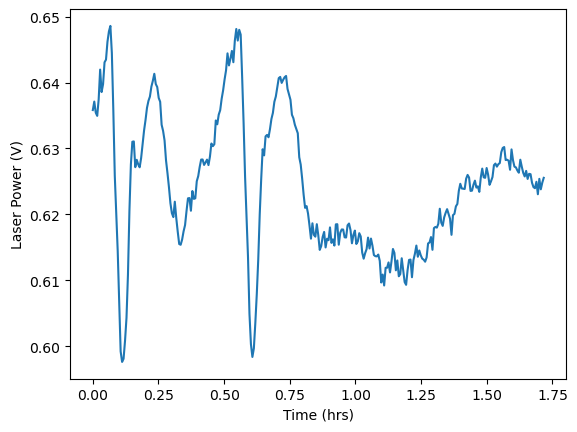

In [160]:
lb = 34500
ub = 38500
plt.imshow(np.log(np.array(PSDy_l)[:,lb:ub]), aspect = 'auto', extent = (345, 385, tot_num*20/3600, 0))
plt.colorbar()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
lb = 26500
ub = 29500
plt.figure()
plt.imshow(np.log(np.array(PSDx_l)[:,lb:ub]), aspect = 'auto', extent = (265, 295, tot_num*20/3600, 0))
plt.colorbar()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
lb = 5600
ub = 8200
plt.figure()
plt.imshow(np.log(np.array(PSDz_l)[:,lb:ub]), aspect = 'auto', extent = (56, 82, tot_num*20/3600, 0))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (hrs)')
plt.figure()
plt.plot(np.linspace(0, tot_num*20/3600, tot_num), Charge)
plt.xlabel('Time (hrs)')
plt.ylabel('Charge (V)')
plt.figure()
plt.plot(np.linspace(0, tot_num*20/3600, tot_num), LP)
plt.xlabel('Time (hrs)')
plt.ylabel('Laser Power (V)')

In [260]:
#PSDx_l = []
#PSDz_l = []
#PSDy_l = []
#Charge = []
#LP = []

save_lib = {'x': PSDx_l2,'y': PSDy_l2,'z': PSDz_l2, 'FB': FB, 'LP': LP2}
filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240328/Overnight analysis/analysed.mat'
sio.savemat(filename, save_lib)

In [ ]:
#PSDz_avr = np.zeros(50001)
PSDz_l = []
FB = []
for i in range(1, 300):
    filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240322/tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    x = np.transpose(data['C'])[0]
    PSDz = scisig.welch(x[:], fs = 10**6, nperseg = 10**5)
    #PSDz_avr += PSDz[1]
    PSDz_l.append(PSDz[1])
    x = np.transpose(data['E'])[0]
    FB.append(np.mean(x))
#PSDz_avr /= 160

c:\Users\yuhan\anaconda3\envs\nanospheres\lib\site-packages\scipy\signal\_signaltools.py:3569: RuntimeWarning: invalid value encountered in subtract
  ret = data - np.mean(data, axis, keepdims=True)
c:\Users\yuhan\anaconda3\envs\nanospheres\lib\site-packages\scipy\signal\_spectral_py.py:1994: RuntimeWarning: invalid value encountered in multiply
  result = win * result


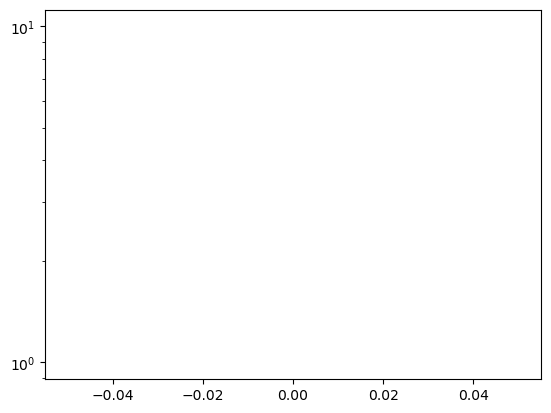

In [ ]:
lb = 6000
ub = 7000
plt.plot(PSDz[0][lb:ub], PSDz_avr[lb:ub])
plt.yscale('log')

Text(0, 0.5, 'Time (s)')

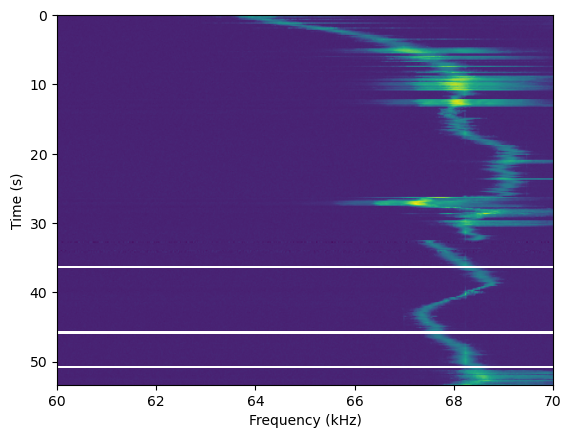

In [ ]:
plt.imshow(np.log(np.array(PSDz_l)[:,lb:ub]), aspect = 'auto', extent = (60, 70, 160*20/60, 0))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Time (s)')


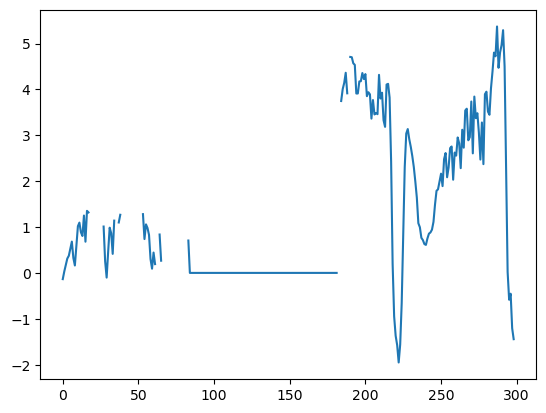

In [ ]:
FB = []
for i in range(0, 247):
    filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240322/tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    x = np.transpose(data['E'])[0]
    FB.append(np.mean(x))

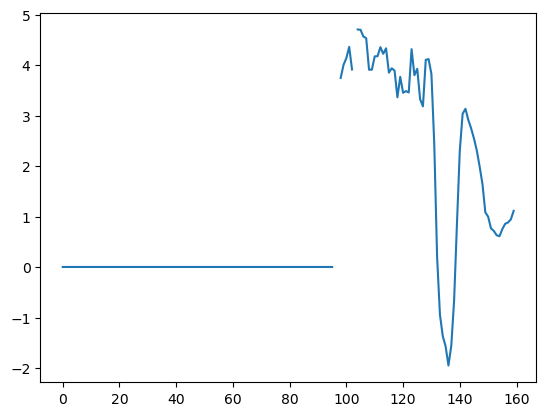